In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df_fill = df.copy()

In [6]:
age_mean = np.mean(df['Age'])
age_std = np.std(df['Age'])
age_null_num = df['Age'].isnull().sum()

print(f"{age_mean} {age_std} {age_null_num}")

29.69911764705882 14.516321150817316 177


In [28]:
age_norm1 = stats.norm.rvs(loc=age_mean, scale=age_std, size=age_null_num)
age_norm2 = stats.norm.rvs(loc=age_mean, scale=age_std, size=age_null_num)

In [29]:
age_nullid = df[df['Age'].isnull()].index
age_nullid

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [30]:
age_norm_df1 = pd.Series(age_norm1, index=age_nullid)
age_norm_df2 = pd.Series(age_norm2, index=age_nullid)

In [31]:
df_fill['Age'] = df_fill['Age'].fillna(age_norm_df1)
df['Age'] = df['Age'].fillna(age_norm_df2)

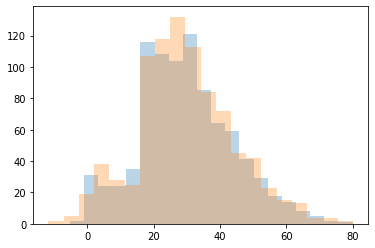

In [32]:
plt.hist(df['Age'], bins=20, alpha=0.3)
plt.hist(df_fill['Age'], bins=20, alpha=0.3)
plt.show()

0~100の一様分布に従う乱数を作成

In [20]:
np.random.randint(0,100,20)

array([77, 87, 35, 58,  7, 35, 93, 41, 21,  5, 26, 45, 50, 27, 77, 32, 46,
       13, 78, 14])

In [22]:
non_null_num = df['Sex'].count()
non_null_num

891

In [24]:
rd = np.random.randint(0,100,non_null_num)
df_fill['Sex'] = rd

In [25]:
df_fill['Sex']

0      36
1      24
2      61
3      39
4      75
       ..
886    30
887    68
888    45
889    58
890    72
Name: Sex, Length: 891, dtype: int64

In [26]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [35]:
data1 = df[['Pclass', 'Sex', 'Age', 'Fare']]
data2 = df_fill[['Pclass', 'Sex', 'Age', 'Fare']]
label = df['Survived']

In [38]:
clf1 = SVC(C=10)
clf2 = SVC(C=10)
scores1 = cross_val_score(clf1, data1, label, cv=5)
scores2 = cross_val_score(clf2, data2, label, cv=5)
score1 = np.mean(scores1)
score2 = np.mean(scores2)

print(f"変換なし:\t{score1:.3f}")
print(f"変換あり:\t{score2:.3f}")

変換なし:	0.680
変換あり:	0.673
